In [38]:
## Capstone Project

## Project Title: Smart Food Waste Management System

In [39]:
## (1) Exploratory Data Analysis (EDA):

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (file)
data = pd.read_csv("synthetic_food_waste_data.csv")

In [41]:
data.head()

,Household_ID,Dietary_Preferences,Family_Size,Food_Item,Purchase_Amount,Consumption_Amount,Waste_Amount,Waste_Type,Storage_Method,Disposal_Method,Timestamp
0,db142552-23bb-495d-9991-cc0138536b04,Vegan,1,Meat,17.67,14.49,3.18,Avoidable,Refrigerated,Donation,2024-03-17
1,11ce28fe-3331-4261-a3c1-4888a5a53d65,Omnivore,1,Beverages,13.08,9.10,3.98,Avoidable,Pantry,Trash,2024-06-26
2,e92bc800-d043-473e-9111-43ecd8e1ad69,Omnivore,6,Meat,1.64,1.21,0.43,Avoidable,Frozen,Donation,2024-07-26
3,f91d51f5-09b1-4f80-bc7f-06ebaaf71a2d,Pescatarian,5,Grains,6.18,1.36,4.82,Avoidable,Refrigerated,Trash,2024-08-07
4,ef3e6de5-f1cf-4a75-aa70-c029cb483f7d,Pescatarian,6,Meat,5.02,4.67,0.35,Avoidable,Pantry,Trash,2024-03-30


In [42]:
# Basic information
print("Dataset Info:")
print(data.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Household_ID         1000 non-null   object 
 1   Dietary_Preferences  1000 non-null   object 
 2   Family_Size          1000 non-null   int64  
 3   Food_Item            1000 non-null   object 
 4   Purchase_Amount      1000 non-null   float64
 5   Consumption_Amount   1000 non-null   float64
 6   Waste_Amount         1000 non-null   float64
 7   Waste_Type           1000 non-null   object 
 8   Storage_Method       1000 non-null   object 
 9   Disposal_Method      1000 non-null   object 
 10  Timestamp            1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB
None

Descriptive Statistics:
       Family_Size  Purchase_Amount  Consumption_Amount  Waste_Amount
count  1000.000000      1000.000000         1000.000000   1000.0000

In [43]:
# Checking for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Household_ID           0
Dietary_Preferences    0
Family_Size            0
Food_Item              0
Purchase_Amount        0
Consumption_Amount     0
Waste_Amount           0
Waste_Type             0
Storage_Method         0
Disposal_Method        0
Timestamp              0
dtype: int64


In [44]:
#Conversion of Timestamp to datetime format

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Household_ID         1000 non-null   object        
 1   Dietary_Preferences  1000 non-null   object        
 2   Family_Size          1000 non-null   int64         
 3   Food_Item            1000 non-null   object        
 4   Purchase_Amount      1000 non-null   float64       
 5   Consumption_Amount   1000 non-null   float64       
 6   Waste_Amount         1000 non-null   float64       
 7   Waste_Type           1000 non-null   object        
 8   Storage_Method       1000 non-null   object        
 9   Disposal_Method      1000 non-null   object        
 10  Timestamp            1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 86.1+ KB


In [45]:
data.head()

,Household_ID,Dietary_Preferences,Family_Size,Food_Item,Purchase_Amount,Consumption_Amount,Waste_Amount,Waste_Type,Storage_Method,Disposal_Method,Timestamp
0,db142552-23bb-495d-9991-cc0138536b04,Vegan,1,Meat,17.67,14.49,3.18,Avoidable,Refrigerated,Donation,2024-03-17
1,11ce28fe-3331-4261-a3c1-4888a5a53d65,Omnivore,1,Beverages,13.08,9.10,3.98,Avoidable,Pantry,Trash,2024-06-26
2,e92bc800-d043-473e-9111-43ecd8e1ad69,Omnivore,6,Meat,1.64,1.21,0.43,Avoidable,Frozen,Donation,2024-07-26
3,f91d51f5-09b1-4f80-bc7f-06ebaaf71a2d,Pescatarian,5,Grains,6.18,1.36,4.82,Avoidable,Refrigerated,Trash,2024-08-07
4,ef3e6de5-f1cf-4a75-aa70-c029cb483f7d,Pescatarian,6,Meat,5.02,4.67,0.35,Avoidable,Pantry,Trash,2024-03-30


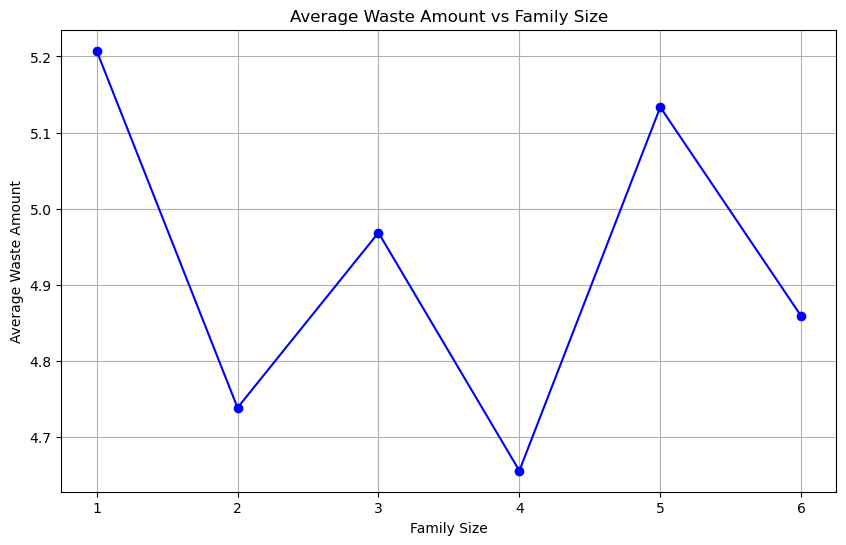

In [46]:
# Plot Average Waste Vs Family Size

# Calculate the average Waste_Amount for each Family_Size
average_waste_by_family_size = data.groupby('Family_Size')['Waste_Amount'].mean()

# Plot the average Waste_Amount vs Family_Size
plt.figure(figsize=(10, 6))
plt.plot(average_waste_by_family_size.index, average_waste_by_family_size.values, marker='o', color='blue', linestyle='-')
plt.title('Average Waste Amount vs Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Waste Amount')
plt.grid(True)
plt.show()

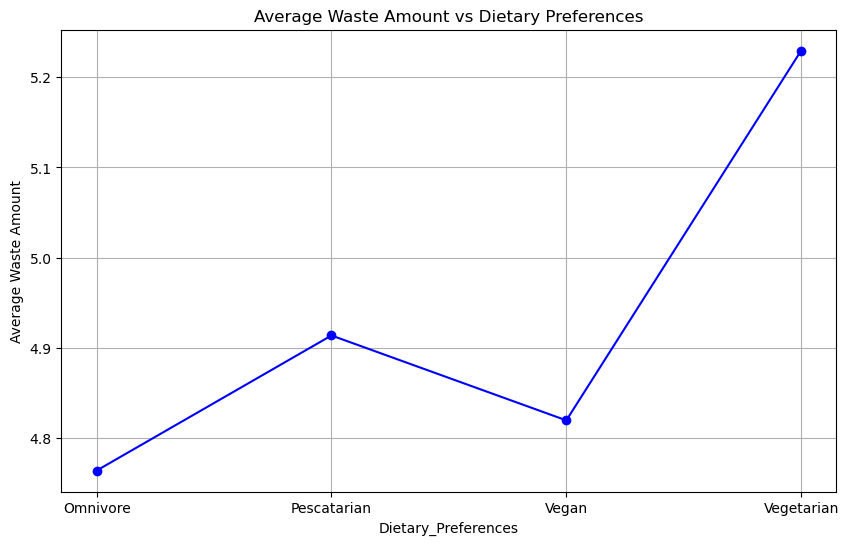

In [47]:
# Plot Average Waste Vs Dietary Preferences

# Calculate the average Waste_Amount for each Dietary_Preferences
average_waste_by_Dietary_Preferences = data.groupby('Dietary_Preferences')['Waste_Amount'].mean()

# Plot the average Waste_Amount vs Family_Size
plt.figure(figsize=(10, 6))
plt.plot(average_waste_by_Dietary_Preferences.index, average_waste_by_Dietary_Preferences.values, marker='o', color='blue', linestyle='-')
plt.title('Average Waste Amount vs Dietary Preferences')
plt.xlabel('Dietary_Preferences')
plt.ylabel('Average Waste Amount')
plt.grid(True)
plt.show()

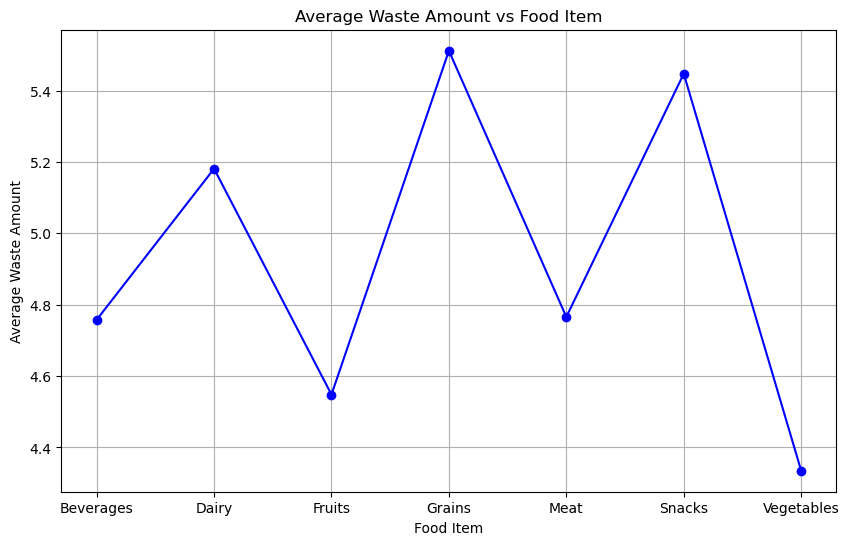

In [48]:
# Plot Average Waste Vs Food Item

# Calculate the average Waste_Amount for each Dietary_Preferences
average_waste_by_Food_Item = data.groupby('Food_Item')['Waste_Amount'].mean()

# Plot the average Waste_Amount vs Food Item
plt.figure(figsize=(10, 6))
plt.plot(average_waste_by_Food_Item.index, average_waste_by_Food_Item.values, marker='o', color='blue', linestyle='-')
plt.title('Average Waste Amount vs Food Item')
plt.xlabel('Food Item')
plt.ylabel('Average Waste Amount')
plt.grid(True)
plt.show()

                     Dietary_Preferences  Family_Size  Food_Item  Waste_Amount
Dietary_Preferences             1.000000     0.022821  -0.006331      0.034611
Family_Size                     0.022821     1.000000   0.029877     -0.009058
Food_Item                      -0.006331     0.029877   1.000000     -0.007571
Waste_Amount                    0.034611    -0.009058  -0.007571      1.000000


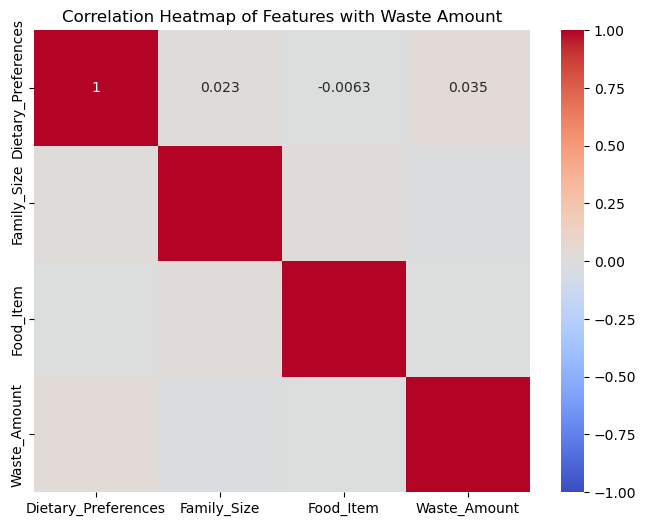

In [51]:
# Draw the correlation matrix of Dietary_Preferences, Family_Size, and Food_Item with Waste_Amount

# Calculation of correlations
correlation_matrix = data[['Dietary_Preferences', 'Family_Size', 'Food_Item', 'Waste_Amount']].corr()
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features with Waste Amount")
plt.show()

In [ ]:
## (2) Predictive Modeling:

data.head()


In [50]:
# Label encoding of categorical variables

from sklearn.preprocessing import LabelEncoder

# Label encoding of categorical variables
le_dietary = LabelEncoder()
le_food_item = LabelEncoder()
le_waste_type = LabelEncoder()
le_storage = LabelEncoder()
le_disposal = LabelEncoder()

# Apply encoding
data['Dietary_Preferences'] = le_dietary.fit_transform(data['Dietary_Preferences'])
data['Food_Item'] = le_food_item.fit_transform(data['Food_Item'])
data['Waste_Type'] = le_waste_type.fit_transform(data['Waste_Type'])
data['Storage_Method'] = le_storage.fit_transform(data['Storage_Method'])
data['Disposal_Method'] = le_disposal.fit_transform(data['Disposal_Method'])

# Display encoding details
encoding_summary = {
    'Dietary_Preferences': dict(zip(le_dietary.classes_, range(len(le_dietary.classes_)))),
    'Food_Item': dict(zip(le_food_item.classes_, range(len(le_food_item.classes_)))),
    'Waste_Type': dict(zip(le_waste_type.classes_, range(len(le_waste_type.classes_)))),
    'Storage_Method': dict(zip(le_storage.classes_, range(len(le_storage.classes_)))),
    'Disposal_Method': dict(zip(le_disposal.classes_, range(len(le_disposal.classes_))))
}

print("Encoding Details Summary:")
for column, mapping in encoding_summary.items():
    print(f"{column}: {mapping}")

data.head()

Encoding Details Summary:
Dietary_Preferences: {'Omnivore': 0, 'Pescatarian': 1, 'Vegan': 2, 'Vegetarian': 3}
Food_Item: {'Beverages': 0, 'Dairy': 1, 'Fruits': 2, 'Grains': 3, 'Meat': 4, 'Snacks': 5, 'Vegetables': 6}
Waste_Type: {'Avoidable': 0}
Storage_Method: {'Frozen': 0, 'Pantry': 1, 'Refrigerated': 2}
Disposal_Method: {'Compost': 0, 'Donation': 1, 'Feed Animals': 2, 'Trash': 3}


,Household_ID,Dietary_Preferences,Family_Size,Food_Item,Purchase_Amount,Consumption_Amount,Waste_Amount,Waste_Type,Storage_Method,Disposal_Method,Timestamp
0,db142552-23bb-495d-9991-cc0138536b04,2,1,4,17.67,14.49,3.18,0,2,1,2024-03-17
1,11ce28fe-3331-4261-a3c1-4888a5a53d65,0,1,0,13.08,9.10,3.98,0,1,3,2024-06-26
2,e92bc800-d043-473e-9111-43ecd8e1ad69,0,6,4,1.64,1.21,0.43,0,0,1,2024-07-26
3,f91d51f5-09b1-4f80-bc7f-06ebaaf71a2d,1,5,3,6.18,1.36,4.82,0,2,3,2024-08-07
4,ef3e6de5-f1cf-4a75-aa70-c029cb483f7d,1,6,4,5.02,4.67,0.35,0,1,3,2024-03-30


In [18]:
#Normalize numerical features like Mileage, Engine_Size, Odometer_Reading, and Fuel_Efficiency

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data[['Purchase_Amount', 'Consumption_Amount','Waste_Amount']]=scaler.fit_transform(data[['Purchase_Amount', 'Consumption_Amount','Waste_Amount']])

data.head()

,Household_ID,Dietary_Preferences,Family_Size,Food_Item,Purchase_Amount,Consumption_Amount,Waste_Amount,Waste_Type,Storage_Method,Disposal_Method,Timestamp
0,db142552-23bb-495d-9991-cc0138536b04,2,1,4,1.376067,2.190952,-0.412169,0,2,1,2024-03-17
1,11ce28fe-3331-4261-a3c1-4888a5a53d65,0,1,0,0.523291,0.901249,-0.223772,0,1,3,2024-06-26
2,e92bc800-d043-473e-9111-43ecd8e1ad69,0,6,4,-1.602148,-0.986647,-1.059787,0,0,1,2024-07-26
3,f91d51f5-09b1-4f80-bc7f-06ebaaf71a2d,1,5,3,-0.758661,-0.950755,-0.025954,0,2,3,2024-08-07
4,ef3e6de5-f1cf-4a75-aa70-c029cb483f7d,1,6,4,-0.974177,-0.158748,-1.078626,0,1,3,2024-03-30


Linear Regression - Mean Squared Error: 2.560554054557961e-05
Linear Regression - R-Squared: 0.999998179213479
Random Forest Regressor - Mean Squared Error: 0.10721054725000011
Random Forest Regressor - R-Squared: 0.9923763562424615
Gradient Boosting Regressor - Mean Squared Error: 0.12209762836788597
Gradient Boosting Regressor - R-Squared: 0.9913177495480316


C:\Users\48158259\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 39.0070
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.1156
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5899
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5465
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3609
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2815
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2403
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1945
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1641
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1426
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1236
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0982
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0816
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0661
Epoch 16/50
80/80

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Neural Network - Mean Squared Error: 0.022248132371930636
Neural Network - R-Squared: 0.9984179556972259


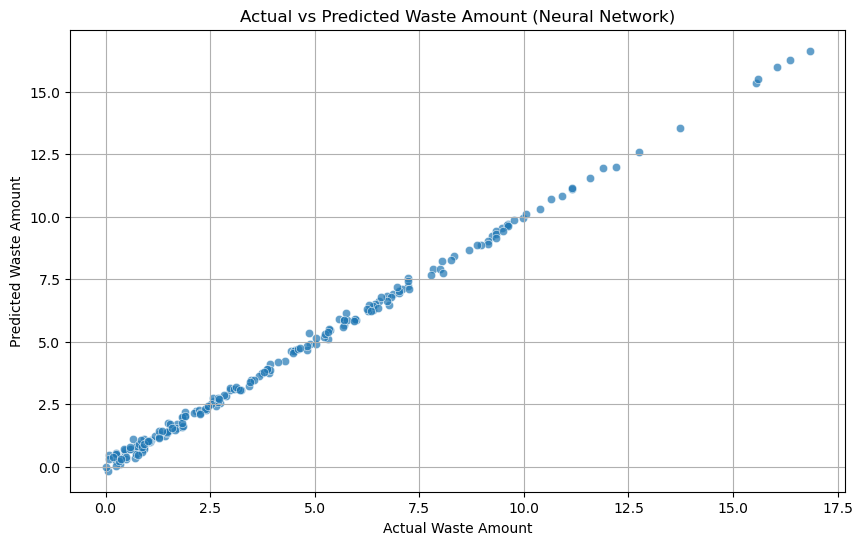

In [53]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Split Data into Features and Target Variable
X = data[['Dietary_Preferences', 'Family_Size', 'Food_Item', 'Purchase_Amount', 
          'Consumption_Amount', 'Storage_Method', 'Disposal_Method']]
y = data['Waste_Amount']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and Evaluate Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Initialize Metrics Dictionary
metrics = {
    "Model": [],
    "Mean Squared Error": [],
    "R-Squared": []
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append Metrics
    metrics["Model"].append(name)
    metrics["Mean Squared Error"].append(mse)
    metrics["R-Squared"].append(r2)
    
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-Squared: {r2}")

    # Save Model
    with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Save the Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train Neural Network
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate Neural Network
nn_y_pred = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

print(f"Neural Network - Mean Squared Error: {nn_mse}")
print(f"Neural Network - R-Squared: {nn_r2}")

# Append Metrics
metrics["Model"].append("Neural Network")
metrics["Mean Squared Error"].append(nn_mse)
metrics["R-Squared"].append(nn_r2)

# Save Neural Network Model
nn_model.save('neural_network_model.h5')

# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=nn_y_pred.flatten(), alpha=0.7)
plt.title('Actual vs Predicted Waste Amount (Neural Network)')
plt.xlabel('Actual Waste Amount')
plt.ylabel('Predicted Waste Amount')
plt.grid(True)
plt.show()


In [55]:
metrics

{'Model': ['Linear Regression',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'Neural Network'],
 'Mean Squared Error': [2.560554054557961e-05,
  0.10721054725000011,
  0.12209762836788597,
  0.022248132371930636],
 'R-Squared': [0.999998179213479,
  0.9923763562424615,
  0.9913177495480316,
  0.9984179556972259]}

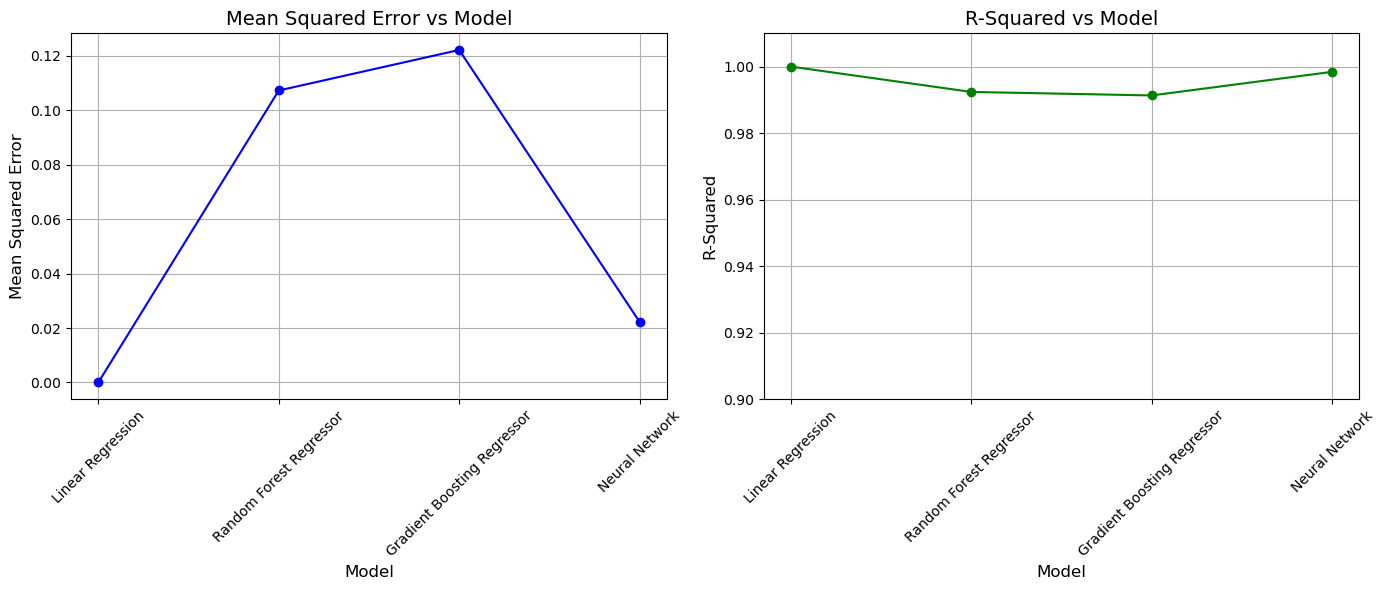

In [60]:
## Selecting the best performing model

import matplotlib.pyplot as plt
import pandas as pd

# Convert data to a DataFrame
df = pd.DataFrame(metrics)

# Set up a subplot grid (1 row, 2 columns for the 2 metrics)
plt.figure(figsize=(14, 6))

# Plot Mean Squared Error vs Model
plt.subplot(1, 2, 1)
plt.plot(df['Model'], df['Mean Squared Error'], marker='o', linestyle='-', color='blue')
plt.title("Mean Squared Error vs Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)

# Plot R-Squared vs Model
plt.subplot(1, 2, 2)
plt.plot(df['Model'], df['R-Squared'], marker='o', linestyle='-', color='green')
plt.title("R-Squared vs Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R-Squared", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0.9, 1.01)  # Adjust y-axis range to better display R-Squared values close to 1
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
## (3) Recommendation System: 
''' 
Create a system that provides personalized recommendations for reducing food waste, such as meal planning, purchasing tips, 
and storage advice.
'''

' \nCreate a system that provides personalized recommendations for reducing food waste, such as meal planning, purchasing tips, \nand storage advice.\n'

In [36]:
# Recommender system is developed and in this code the inout data for a test case is gived via hardcoded

from sklearn.neighbors import NearestNeighbors

# Function to provide recommendations based on dietary preferences, storage methods and purchasing amounts
def generate_recommendations(household):
    recommendations = []
    
    # Meal Planning Advice based on Dietary Preferences
    if household['Dietary_Preferences'] == 'Vegan':
        recommendations.append("Focus on plant-based proteins and avoid buying perishable produce in bulk.")
    elif household['Dietary_Preferences'] == 'Omnivore':
        recommendations.append("Incorporate leftover ingredients into new recipes to reduce waste.")
    elif household['Dietary_Preferences'] == 'Pescatarian':
        recommendations.append("Plan meals around fresh seafood and consume it early to avoid spoilage.")
    elif household['Dietary_Preferences'] == 'Vegetarian':
        recommendations.append("Use meal prep to ensure plant-based foods are consumed before expiration.")
    
    # Storage Advice based on Storage Method
    if household['Storage_Method'] == 'Refrigerated':
        recommendations.append("Store leafy greens in sealed containers and avoid overpacking the fridge.")
    elif household['Storage_Method'] == 'Pantry':
        recommendations.append("Keep items like grains and canned goods organized by expiration date.")
    elif household['Storage_Method'] == 'Frozen':
        recommendations.append("Label frozen items with dates and defrost only what you need.")
    
    # General Purchasing Tips
    if household['Purchase_Amount'] > household['Consumption_Amount'] * 1.2:
        recommendations.append("Reduce the quantity of items purchased to match consumption levels.")
    elif household['Waste_Amount'] > 2:
        recommendations.append("Track weekly waste and adjust shopping lists accordingly.")
    
    return recommendations


# Collaborative Filtering to Find Similar Households
def find_similar_households(household_data, data, n_neighbors=2):
    # Prepare features for Nearest Neighbors
    features = data[['Family_Size', 'Purchase_Amount', 'Waste_Amount']]
    
    # Fit Nearest Neighbors Model
    model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    model.fit(features)
    
    # Convert household data to the same feature format
    household_features = pd.DataFrame([household_data])[['Family_Size', 'Purchase_Amount', 'Waste_Amount']].values
    
    # Find similar households
    distances, indices = model.kneighbors(household_features)
    similar_households = data.iloc[indices[0]]
    
    return similar_households

# Example Input for a Single Household
household_data = {
    'Household_ID': 'H6',
    'Dietary_Preferences': 'Vegetarian',
    'Family_Size': 3,
    'Food_Item': 'Vegetables',
    'Purchase_Amount': 12,
    'Consumption_Amount': 10,
    'Waste_Amount': 2,
    'Waste_Type': 'Organic',
    'Storage_Method': 'Shelf',
    'Disposal_Method': 'Compost'
}

# Generate Recommendations for the Household
household_recommendations = generate_recommendations(household_data)
print(f"Recommendations for Household {household_data['Household_ID']}:")
for rec in household_recommendations:
    print(f"- {rec}")

# Find Similar Households
similar_households = find_similar_households(household_data, data, n_neighbors=2)
print("\nSimilar Households and Their Recommendations:")
for _, row in similar_households.iterrows():
    print(f"Household ID: {row['Household_ID']}")
    similar_recommendations = generate_recommendations(row)
    for rec in similar_recommendations:
        print(f"- {rec}")
    print()

Recommendations for Household H6:
- Use meal prep to ensure plant-based foods are consumed before expiration.

Similar Households and Their Recommendations:
Household ID: d7c9cd91-f11b-4dcc-b14d-50c07a68d846
- Reduce the quantity of items purchased to match consumption levels.

Household ID: 6d8d3956-e45a-4691-b38c-fccb22ced9c9
- Reduce the quantity of items purchased to match consumption levels.



C:\Users\48158259\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
## (4) User Interface: Design an intuitive application that displays insights and recommendations to users.